In [11]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
import copy
import math

In [14]:
def getRegion(I,u,v,r):
    p = []
    for i in range(u-r,u+r):
        for j in range(v-r,v+r):
            if ((u-i)**2 + (v-j)**2)<=r*r:
                p.append(I[i,j])
    return p
def TrimmedAggregateDistance(pi,p,a):
    n = len(p)
    D = []
    for i in range(0,n):
        dq = 0
        for k in range(0,2):
            dq = dq + abs(pi[k]-p[i][k])
        D.append(dq)
    D.sort()
    d = 0
    for i in range(1,a):
        d = d + D[i]
    return d
def SharpeningVectorMedianFilter(img,r,s,t):
    m = img.shape[0]
    n = img.shape[1]
    img2 = copy.copy(img)
    for i in range(r,m-r):
        for j in range(r, n-r):
            p = getRegion(img,i,j,r)
            x = len(p)
            a = round(x - s*(x - 2))
            dctr = TrimmedAggregateDistance(img[i,j],p,a)
            dmin = math.inf
            for pi in p:
                d = TrimmedAggregateDistance(pi,p,a)
                if (d<dmin):
                    pmin = pi
                    dmin = d
            if(dctr - dmin)>t*a:
                img2[i,j] = pmin
            else:
                img2[i,j] = img[i,j]
    return img2

            

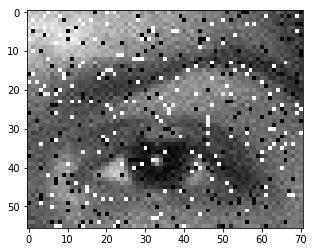

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in ubyte_scalars
  


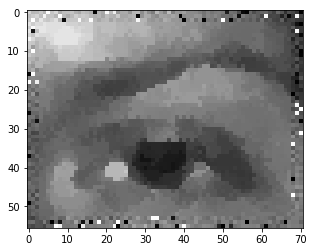

In [16]:
img =cv2.imread("C:/Users/Acer/opencvProj/te.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
nimg = SharpeningVectorMedianFilter(img,3, 0.5,2)
plt.imshow(nimg)
plt.show()